In [115]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [116]:
img = cv2.imread('images/coin5.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [117]:
cv2.imshow('img', thresh)
cv2.waitKey()
cv2.destroyAllWindows()

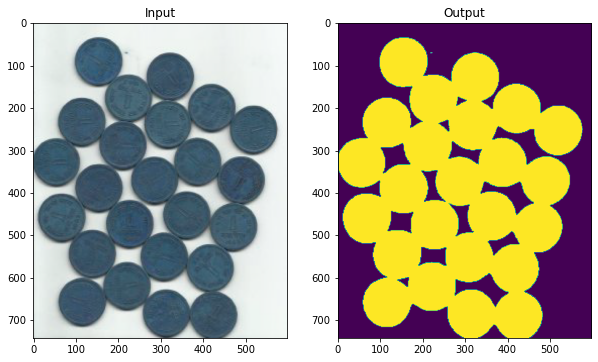

In [118]:
plt.figure(figsize=(10,7))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(thresh),plt.title('Output')
plt.show()

In [127]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


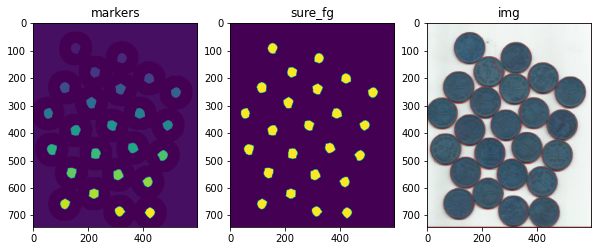

In [128]:
plt.figure(figsize=(10,7))
plt.subplot(131),plt.imshow(markers),plt.title('markers')
plt.subplot(132),plt.imshow(sure_fg),plt.title('sure_fg')
plt.subplot(133),plt.imshow(img),plt.title('img')

plt.show()

In [121]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


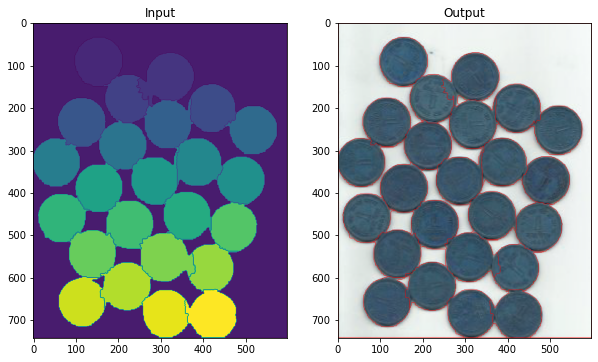

In [122]:
plt.figure(figsize=(10,7))
plt.subplot(121),plt.imshow(markers),plt.title('Input')
plt.subplot(122),plt.imshow(img),plt.title('Output')
plt.show()